# Naive Bayes Gaussian - Babies,  Teens and Adults 
by Carlos Alfonso Gómez Hernández

### Generating some training data
Each indiviudal has two atributes (x0,x1) 

* x0  is heigth and 
* x1  is weight 

There are two clases of individuals

* Babies,
* Teens  and 
* Adults

We generate  training examples 

* 50 babies ~ Gaussian([60, 30], [[50,15],[15, 30]])
* 70 tens ~ Gaussian([120, 50], [[90,10 ],[10, 40]])
* 120 adults ~ Gaussian([150, 80], [[60, 10],[10, 40]])

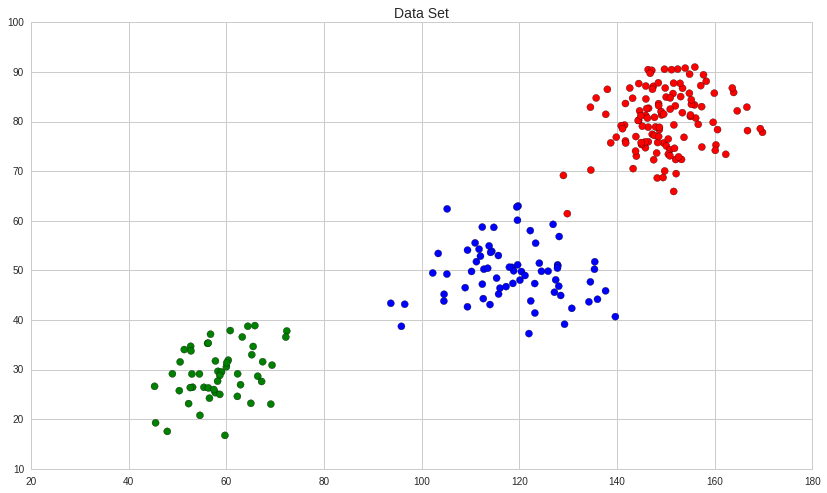

In [3]:
import numpy as np
import matplotlib.pyplot as plt

children = np.random.multivariate_normal([120, 50], [[90,10 ],[10, 40]], 70)
adults = np.random.multivariate_normal([150, 80], [[60, 10],[10, 40]], 120)
babies = np.random.multivariate_normal([60,30], [[50,15],[15,30]], 50)
x = np.concatenate((children ,adults, babies),axis=0)

y1 = np.empty(len(children)) #Set Color blue
y2 = np.empty(len(adults)) #red
y3 = np.empty(len(babies)) #green
y1.fill(0)
y2.fill(1)
y3.fill(2)
y = np.concatenate((y1,y2,y3),axis=0)

color= ['blue' if v == 0 else ('red' if v==1 else 'green') for v in y]
plt.scatter(x[:,0].tolist(), x[:,1].tolist(),  c=color, s=50)
plt.title('Data Set', size=14);

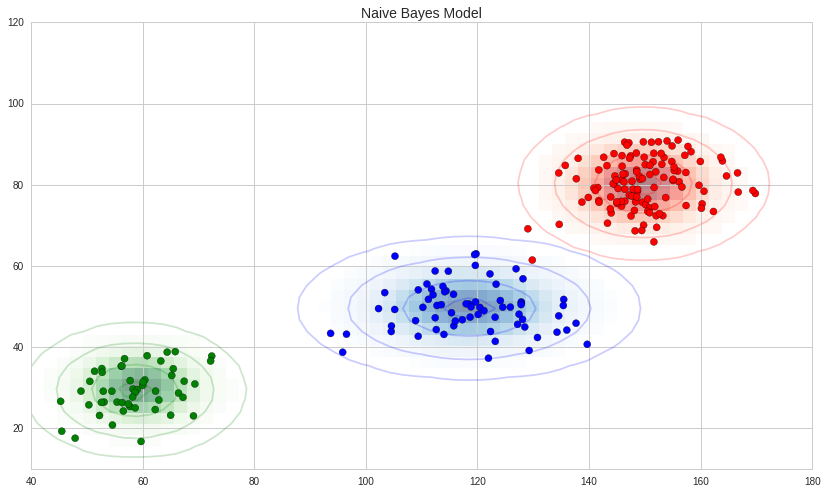

In [4]:
fig, ax = plt.subplots()
color= ['blue' if v == 0 else ('red' if v==1 else 'green') for v in y]
ax.scatter(x[:,0].tolist(), x[:,1].tolist(),  c=color, s=50);
ax.set_title('Naive Bayes Model', size=14)
xlim = (40, 180)
ylim = (10, 120)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['blue', 'red', 'green']):
    mask = (y == label)
    mu, std = x[mask].mean(0), x[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim);

In [5]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x, y);

### The desicion boundary in Gaussian naive Bayes is quadratic.

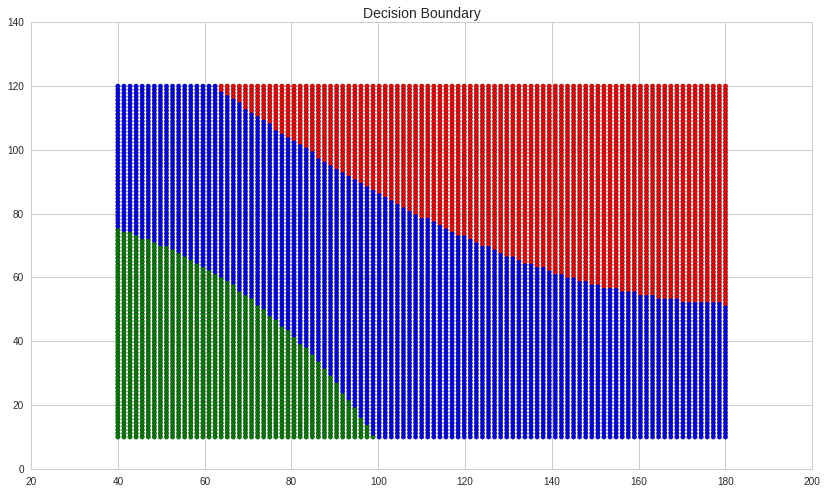

In [6]:
x0 =  np.linspace(40,180,101)
x1 =  np.linspace(10,120,101)
g = np.meshgrid(x0,x1)
xmesh = np.append(g[0].reshape(-1,1),g[1].reshape(-1,1),axis=1)
ymesh= model.predict(xmesh)

colormesh= ['blue' if v == 0 else  ('red' if v==1 else 'green') for v in ymesh]
plt.scatter(xmesh[:, 0], xmesh[:, 1], c=colormesh )
plt.title('Decision Boundary', size=14);

### Testing the model with some random data

In [7]:
rng = np.random.RandomState(0)
xnew = [40, 20] + [140, 140] * rng.rand(500, 2) 
ynew = model.predict(xnew)

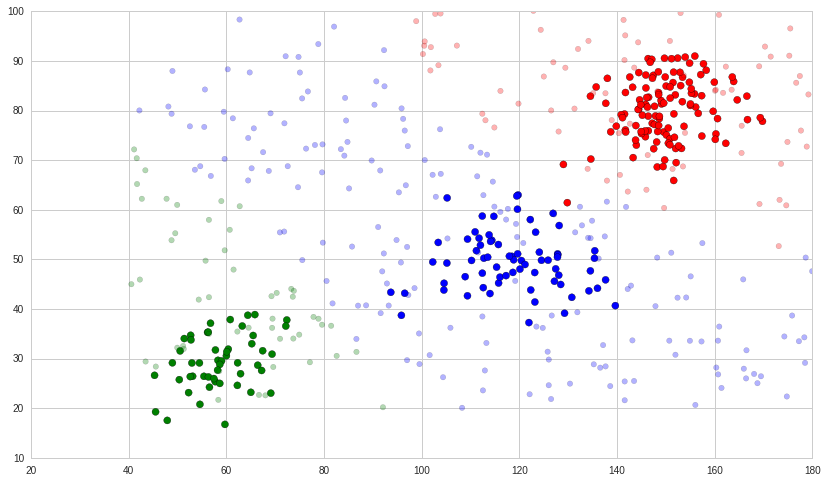

In [8]:
color= ['blue' if v == 0 else  ('red' if v==1 else 'green') for v in y]
plt.scatter(x[:,0].tolist(), x[:,1].tolist(),  c=color, s=50);
lim = plt.axis()

colornew= ['blue' if v == 0 else  ('red' if v==1 else 'green') for v in ynew]
plt.scatter(xnew[:, 0], xnew[:, 1], c=colornew, s=30,  alpha=0.3)
plt.axis(lim);

### Pobabilistic classification - posterior probabilities for the classes

In [9]:
xnew[-20:].round(2)

array([[  70.81,  107.21],
       [  55.61,   84.26],
       [  85.13,   64.31],
       [ 107.56,  122.18],
       [  49.69,  143.08],
       [ 142.87,   44.71],
       [ 171.48,   90.88],
       [ 179.97,   47.62],
       [ 114.89,   60.63],
       [  82.58,  102.75],
       [ 169.04,  132.74],
       [ 141.35,   98.28],
       [ 169.12,   88.93],
       [ 162.34,  136.76],
       [  69.94,  127.97],
       [  41.7 ,   65.2 ],
       [  72.14,   90.96],
       [ 143.16,   33.67],
       [ 112.09,  151.38],
       [  72.01,  114.8 ]])

In [10]:
yprob = model.predict_proba(xnew[-20:])
yprob.round(2)

array([[ 0.99,  0.01,  0.  ],
       [ 1.  ,  0.  ,  0.  ],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ],
       [ 0.97,  0.03,  0.  ],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.16,  0.84,  0.  ],
       [ 0.  ,  1.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  ],
       [ 1.  ,  0.  ,  0.  ],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ],
       [ 0.01,  0.99,  0.  ]])

## References
1. Naive Bayes 3: Gaussian examplea  Victor Lavrenko  https://www.youtube.com/watch?v=r1in0YNetG8&amp;list=PLBv09BD7ez_7-4V3IJIzCHWQj9nd4rVWB&amp;index=3
2. In Depth: Naive Bayes Classification https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Gaussian-Naive-Bayes
3. 6 Easy Steps to Learn Naive Bayes Algorithm (with codes in Python and R)
https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/